In [3]:
import pandas as pd
import numpy as np
import ETL.config as config
import ETL.utils as utils
import ETL.extract_data as extract
import ETL.config as config
import importlib
importlib.reload(config)
importlib.reload(extract)


<module 'ETL.extract_data' from 'c:\\Users\\jimmy\\Documents\\Data Projects\\Project\\Financial Transactions Project\\scripts\\ETL\\extract_data.py'>

In [4]:
users = pd.read_csv(config.USERS_FILE_LOCAL)
users.sample(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1802,455,41,69,1979,1,Female,8676 River Avenue,40.66,-73.73,$24412,$49776,$17352,684,3
254,1314,43,70,1976,11,Male,857 Jefferson Avenue,29.70,-98.11,$19325,$39404,$71859,723,5
469,1574,22,69,1997,3,Female,7318 Mill Lane,34.89,-77.54,$15661,$31933,$65405,746,1
41,1844,79,72,1941,2,Male,829 Birch Boulevard,27.80,-97.39,$23608,$37503,$14272,706,5
1004,1647,18,65,2002,2,Female,1358 Plum Avenue,41.31,-79.38,$17321,$35311,$44783,684,5


In [5]:
#check data
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [6]:
#check duplicate values in id column
print(f'Total duplicate values in "id" colum: {users.duplicated(subset=['id']).sum()}')

Total duplicate values in "id" colum: 0


In [7]:
users.describe(include='all')

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,2,1999,NaN,NaN,1754,1948,1880,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Female,506 Washington Lane,NaN,NaN,$0,$44128,$0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1016,2,NaN,NaN,15,3,102,NaN,NaN
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,NaN,NaN,37.389225,-91.554765,NaN,NaN,NaN,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,NaN,NaN,5.114324,16.283293,NaN,NaN,NaN,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,NaN,NaN,20.880000,-159.410000,NaN,NaN,NaN,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,NaN,NaN,33.837500,-97.395000,NaN,NaN,NaN,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,NaN,NaN,38.250000,-86.440000,NaN,NaN,NaN,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,NaN,NaN,41.200000,-80.130000,NaN,NaN,NaN,753.000000,4.000000


In [8]:
users.sample(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
284,326,18,61,2001,3,Male,644 Birch Avenue,40.26,-80.18,$30076,$61325,$83899,652,1
1368,240,50,68,1970,2,Male,280 Lake Avenue,36.21,-83.29,$17104,$34868,$51984,745,3
1700,978,21,62,1998,7,Female,288 North Avenue,30.06,-89.93,$27603,$56280,$81803,760,1
973,1169,51,68,1968,11,Female,375 Hillside Drive,30.54,-97.64,$30358,$61901,$29627,726,7
801,1666,61,62,1958,12,Male,649 Spruce Boulevard,32.29,-81.23,$23029,$46954,$69753,578,4


In [8]:
print(f' {users['per_capita_income'].replace(r'[A-Za-z0-9]','',regex=True).value_counts()}')
print(f' {users['yearly_income'].replace(r'[A-Za-z0-9]','',regex=True).value_counts()}')
print(f' {users['total_debt'].replace(r'[A-Za-z0-9]','',regex=True).value_counts()}')

 per_capita_income
$    2000
Name: count, dtype: int64
 yearly_income
$    2000
Name: count, dtype: int64
 total_debt
$    2000
Name: count, dtype: int64


In [9]:
#etl_users.py
import pandas as pd
import logging
import ETL.config as config
logger = logging.getLogger(__name__)


def users_transform(df: pd.DataFrame) -> pd.DataFrame:
    """
    Transform the users DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to transform.
        
    Returns:
        pd.DataFrame: The transformed DataFrame.
    """
    try:
        logger.info('Starting transformation of users DataFrame')
        #clean up values from columns
        df['per_capita_income'] = df['per_capita_income'].fillna(0).str.extract(r'(\d+)').astype(int)
        df['yearly_income'] = df['yearly_income'].fillna(0).str.extract(r'(\d+)').astype(int)
        df['total_debt'] = df['total_debt'].fillna(0).str.extract(r'(\d+)').astype(int) 

        

        logger.info('✅Transformation of users DataFrame completed successfully')
        
    except Exception as e:
        logger.error(f'❌Error during transformation of users DataFrame: {e}')
        raise 
    return df




In [10]:
users_transformed = users_transform(users)
users_transformed.sample(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
405,471,52,65,1967,9,Male,123 Ocean View Street,38.57,-121.17,35137,71645,155006,629,3
1912,1329,24,68,1995,3,Female,6768 Federal Avenue,34.08,-117.46,13739,28011,20196,720,4
1944,1001,20,62,1999,10,Male,6223 Maple Lane,36.56,-82.19,17795,36283,60989,716,1
1609,670,21,71,1998,3,Female,7469 El Camino Street,42.31,-83.21,11773,24006,57226,801,2
698,1327,20,67,1999,12,Female,3183 Burns Boulevard,45.94,-122.67,21093,43006,26144,688,2


In [11]:
users_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 218.9+ KB


In [12]:
#count duplicate rows 
print(f'total duplicate rows {users_transformed.duplicated().sum()}')
#duplicated by columns
duplicated_values = users_transformed.apply(lambda col: col.duplicated().sum())
#print(f'Duplicated values by columns:\n{duplicated_values}')
duplicated_values


total duplicate rows 0


id                      0
current_age          1920
retirement_age       1971
birth_year           1920
birth_month          1988
gender               1998
address                 1
latitude             1011
longitude             776
per_capita_income     246
yearly_income          52
total_debt            120
credit_score         1679
num_credit_cards     1991
dtype: int64

In [13]:
users_transformed.sample(10)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
508,1394,30,58,1989,4,Female,341 Hill Drive,38.63,-90.24,28373,57853,131828,558,4
62,688,44,67,1975,3,Male,5125 Elm Drive,41.31,-111.96,23165,47227,151030,760,4
669,395,39,72,1981,2,Male,1105 Wessex Avenue,32.69,-97.12,24331,49611,110543,739,4
1508,683,61,66,1959,1,Male,201 Grant Drive,40.79,-77.85,25031,51039,0,704,5
1867,682,58,62,1961,10,Male,2130 Valley Stream Lane,40.69,-111.99,17276,35229,60945,724,2
1326,1703,47,65,1972,8,Female,1532 Birch Drive,39.08,-108.55,24115,49169,65994,747,2
732,975,28,67,1991,5,Female,34542 Ninth Drive,42.88,-78.85,14456,29478,39224,675,2
227,904,32,66,1987,8,Male,41 Plum Boulevard,37.96,-76.51,12018,24505,52405,759,1
1775,1032,62,60,1957,6,Female,171 Catherine Lane,36.81,-119.71,17301,26975,17212,673,2
1150,96,69,66,1950,12,Female,20 Oak Street,33.89,-117.78,38948,99825,4344,685,4


In [14]:
df2 = users_transformed.copy()
df2[['id','current_age','retirement_age','per_capita_income','birth_year','birth_month']].describe()

,id,current_age,retirement_age,per_capita_income,birth_year,birth_month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,23141.928000,1973.803000,6.439000
std,577.494589,18.414092,3.628867,11324.137358,18.421234,3.565338
min,0.000000,18.000000,50.000000,0.000000,1918.000000,1.000000
25%,499.750000,30.000000,65.000000,16824.500000,1961.000000,3.000000
50%,999.500000,44.000000,66.000000,20581.000000,1975.000000,7.000000
75%,1499.250000,58.000000,68.000000,26286.000000,1989.000000,10.000000
max,1999.000000,101.000000,79.000000,163145.000000,2002.000000,12.000000


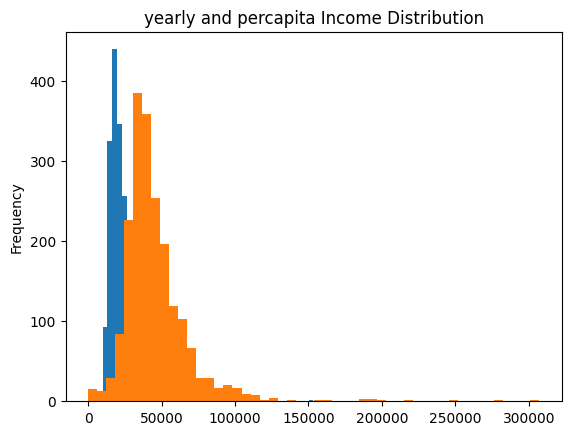

In [15]:
import matplotlib.pyplot as plt
df2['per_capita_income'].plot(kind='hist', bins=50, title='Per Capita Income Distribution')
df2['yearly_income'].plot(kind='hist', bins=50, title='yearly and percapita Income Distribution')
plt.show()

In [16]:
df2['birth_month'].value_counts().sort_index()

birth_month
1     192
2     197
3     167
4     146
5     160
6     130
7     155
8     171
9     165
10    163
11    189
12    165
Name: count, dtype: int64

In [17]:
df2.loc[df2['per_capita_income']> 30000,:]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1
12,1679,18,67,2002,1,Female,829 Fourth Boulevard,41.76,-71.48,33914,69149,89214,776,1
21,777,18,65,2002,1,Male,970 Essex Drive,37.37,-122.21,106305,216740,0,700,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,1395,58,65,1961,9,Male,2687 Burns Avenue,40.98,-74.11,75378,153691,197377,604,2
1959,1339,25,70,1994,8,Male,9181 Elm Avenue,38.01,-121.38,31600,64429,136163,773,2
1965,628,57,66,1963,1,Male,4 George Lane,40.00,-75.26,52517,107075,75999,815,3
1979,1616,48,70,1971,8,Male,469 First Lane,33.00,-97.23,46232,94260,39326,815,4


In [18]:
df2['address'].value_counts().sort_index(ascending=True)

address
0 Elm Street             1
0 Ocean Boulevard        1
1 Burns Lane             1
1 Sixth Boulevard        1
10 Norfolk Boulevard     1
                        ..
9977 Oak Avenue          1
99791 12th Boulevard     1
9982 Summit Boulevard    1
9983 Park Drive          1
9995 Pine Avenue         1
Name: count, Length: 1999, dtype: int64

In [19]:
df2['address'].str.replace(r'\d+', '', regex=True).str.strip()

0                 Rose Lane
1         Federal Boulevard
2               Third Drive
3            Madison Street
4       Valley Stream Drive
               ...         
1995         Lexington Lane
1996              Elm Drive
1997        Fifth Boulevard
1998       Valley Boulevard
1999      Ocean View Street
Name: address, Length: 2000, dtype: object

In [20]:
df2.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278,59696,127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891,77254,191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681,33483,196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145,249925,202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797,109687,183855,675,1


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   int64  
 10  yearly_income      2000 non-null   int64  
 11  total_debt         2000 non-null   int64  
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 218.9+ KB


In [ ]:
import pandas as pd
import logging
import ETL.config as config


logger = logging.getLogger(__name__)

#etl_users.py
import pandas as pd
import logging
import ETL.config as config
logger = logging.getLogger(__name__)


def users_transform(df: pd.DataFrame) -> pd.DataFrame:
    """
    Transform the users DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to transform.
        
    Returns:
        pd.DataFrame: The transformed DataFrame.
    """
    critical_columns = ['user_id']
    columns_to_remove = []
    columns_to_rename = {'id': 'user_id'}

    try:
        logger.info('Starting transformation of users DataFrame')

        df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
        df_cleaned = df_cleaned.drop(columns=columns_to_remove) # Remove specified columns
        df_cleaned = df_cleaned.rename(columns=columns_to_rename) # Rename specified columns

        duplicates_count = df_cleaned.duplicated(subset=critical_columns).sum()
        if duplicates_count > 0:
            duplicates = df.loc[df_cleaned.duplicated(subset=critical_columns), critical_columns]
            logger.info(f"Found {duplicates_count} duplicate records based on columns {critical_columns}.")
            logger.info(f"Duplicate records:\n{duplicates}")
            raise ValueError(f'{duplicates_count} duplicate records found in CARDS data {critical_columns} columns.')

        #clean up values from columns
        df_cleaned['per_capita_income'] = df_cleaned['per_capita_income'].fillna(0).str.extract(r'(\d+)').astype(int)
        df_cleaned['yearly_income'] = df_cleaned['yearly_income'].fillna(0).str.extract(r'(\d+)').astype(int)
        df_cleaned['total_debt'] = df_cleaned['total_debt'].fillna(0).str.extract(r'(\d+)').astype(int)
        df_cleaned['address'] = df_cleaned['address'].fillna('n/a').str.replace(r'\d+', '', regex=True).str.strip().astype(str)

        logger.info('✅Transformation of users DataFrame completed successfully')
        return df_cleaned
    
    except Exception as e:
        logger.error(f'❌Error during transformation of users DataFrame: {e}')
        raise 




In [28]:
users = pd.read_csv(config.USERS_FILE_LOCAL)
users_transformed = users_transform(users)
users_transformed.sample(5)

,user_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1731,1649,64,63,1956,2,Male,8146 Third Avenue,29.79,-95.82,0,399,323,729,3
1340,1404,52,71,1967,11,Female,68 Sixth Avenue,32.30,-95.47,17886,36472,80469,526,2
693,1259,64,69,1955,7,Female,729 Littlewood Avenue,41.18,-73.42,94302,192269,100192,700,6
1412,1911,58,75,1961,11,Female,3856 Valley Boulevard,37.08,-94.50,16574,33793,108196,768,4
217,1664,38,66,1981,10,Male,311 Fifth Drive,42.27,-83.73,34119,69566,50003,791,4


In [29]:
users_transformed['address'].fillna('n/a').str.replace(r'\d+', '', regex=True).str.strip().astype(str)

0                 Rose Lane
1         Federal Boulevard
2               Third Drive
3            Madison Street
4       Valley Stream Drive
               ...         
1995         Lexington Lane
1996              Elm Drive
1997        Fifth Boulevard
1998       Valley Boulevard
1999      Ocean View Street
Name: address, Length: 2000, dtype: object

In [34]:
df2['num_credit_cards'].value_counts()

num_credit_cards
3    449
1    416
2    388
4    376
5    206
6    105
7     40
8     17
9      3
Name: count, dtype: int64